## **Data Loading and Description**

---



In [ ]:
import pandas as pd
import numpy as np
# Load the data
data = pd.read_csv('factory_test_data.csv')
non_numeric_rows = data.apply(lambda x: pd.to_numeric(x, errors='coerce').isnull().any(), axis=1).sum()
print("Number of rows with non-numeric values:", non_numeric_rows)

#Dropping Null values
data = data.apply(pd.to_numeric, errors='coerce').dropna()

print("First 5 rows of the data:")
print(data.head())
print("Dimensions of data:")
print(data.shape)

# Provide summary statistics of each dependent attribute:
print(data['Y1'].describe())
print(data['Y2'].describe())
print(data['Y3'].describe())
print(data['Y4'].describe())
print(data['Y5'].describe())

print("The independant variables- X2,X3,X4,X5 are identical for each row")
print("X2=18, X3=14, X4=12, X5=9")


Number of rows with non-numeric values: 4
First 5 rows of the data:
     Y1    X2     Y2    X3     Y3    X4     Y4   X5    Y5
0  1491  18.0  16.80  14.0  13.33  12.0  11.12  9.0  8.33
2  2004  18.0  17.94  14.0  13.99  12.0  11.72  9.0  8.65
4  1497  18.0  18.00  14.0  13.59  12.0  12.91  9.0  7.82
5  1498  18.0   7.87  14.0  13.52  12.0  11.51  9.0  8.29
6  1492  18.0  20.23  14.0  13.41  12.0   9.73  9.0  8.58
Dimensions of data:
(47, 9)
count      47.000000
mean     1505.957447
std        74.335011
min      1487.000000
25%      1493.000000
50%      1495.000000
75%      1497.000000
max      2004.000000
Name: Y1, dtype: float64
count    47.000000
mean     17.425957
std       4.275727
min       7.870000
25%      14.825000
50%      18.000000
75%      20.250000
max      25.260000
Name: Y2, dtype: float64
count    47.000000
mean     13.452340
std       0.123732
min      13.190000
25%      13.395000
50%      13.450000
75%      13.520000
max      13.990000
Name: Y3, dtype: float64
count    

# **Data Visualization  and Explanation**

**After loading and examining the data, I came to the
conclusion that the relationship between Yi and Xi  is not very interesting
as a result of the Xi variables being identical for each record.
Thus, for the visualization  and for the rest of the assignment I will focus
on Y1,Y2,Y3,Y4,Y5 variables**

      Y1     Y2     Y3     Y4    Y5
0   1491  16.80  13.33  11.12  8.33
2   2004  17.94  13.99  11.72  8.65
4   1497  18.00  13.59  12.91  7.82
5   1498   7.87  13.52  11.51  8.29
6   1492  20.23  13.41   9.73  8.58
8   1493  22.24  13.27  11.21  8.24
10  1496  24.73  13.29  12.67  8.22
11  1501  22.54  13.38  14.56  8.34
12  1487  19.73  13.30  11.34  8.36
13  1497  19.76  13.42  11.50  8.26
14  1498  15.91  13.41  10.60  8.38
15  1498  16.65  13.44  11.08  8.29
16  1493  22.51  13.47  11.15  7.81
17  1496  25.26  13.29  14.18  7.99
18  1497  12.63  13.53  11.32  8.29
19  1491  14.47  13.47  12.75  8.20
20  1491  18.55  13.19   9.10  8.30
21  1495   9.82  13.53  11.28  8.59
22  1488  20.50  13.39  10.84  8.62
23  1495  20.27  13.53  10.87  8.29
24  1496  16.46  13.45  11.72  8.33
25  1496  21.29  13.46  12.17  7.89
26  1495  22.50  13.34  13.30  8.44
27  1491  15.73  13.41  11.49  9.16
28  1510  23.60  13.46  13.97  8.14
29  1494  17.00  13.42  10.27  8.48
30  1493  16.54  13.57  12.4

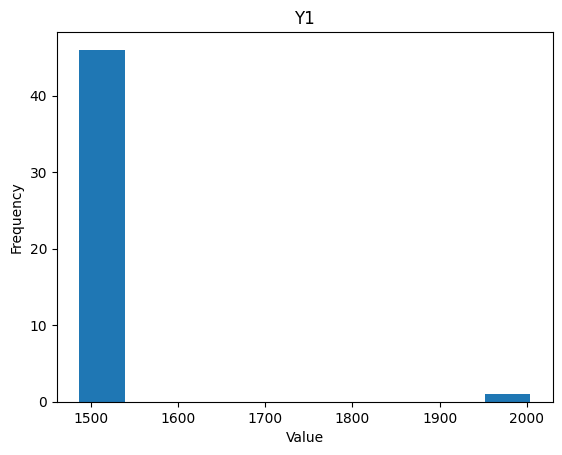

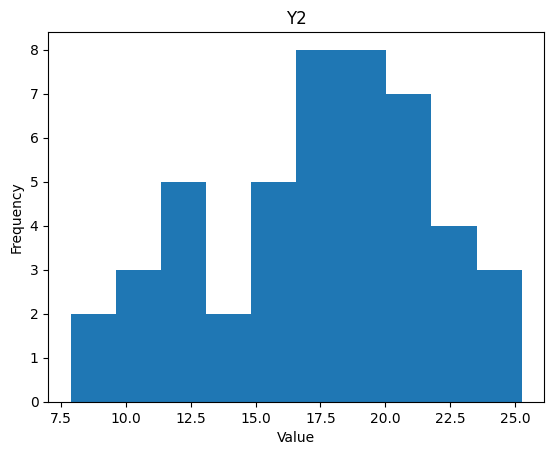

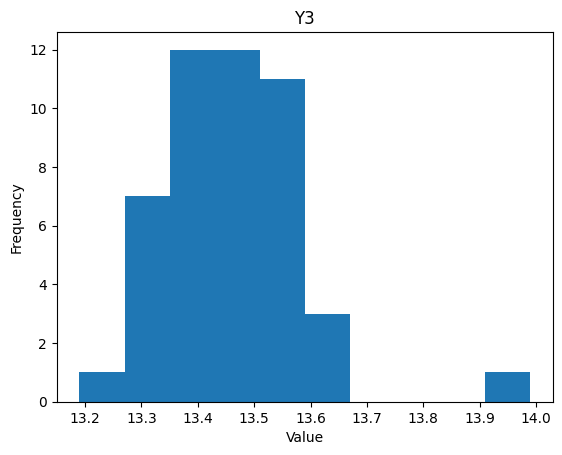

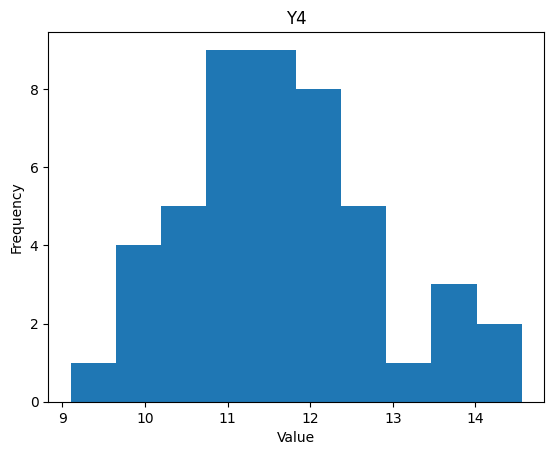

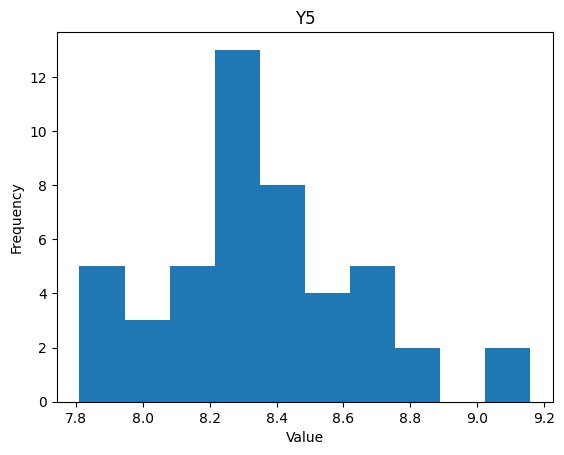

Correlation Matrix: 


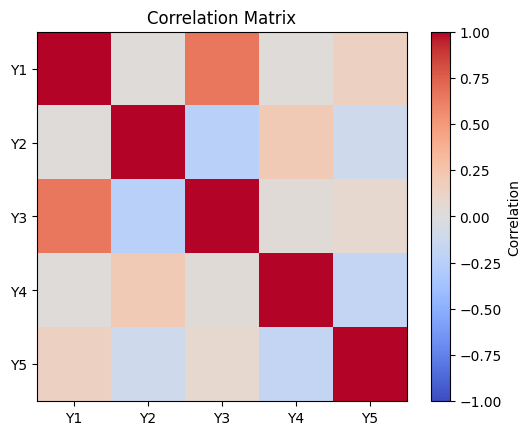

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
Sample_Data=data[['Y1','Y2','Y3','Y4','Y5']]
y_attributes = ['Y1','Y2','Y3','Y4','Y5']
for var in (y_attributes):
      plt.title(f'{var}')
      plt.xlabel("Value")
      plt.ylabel("Frequency")
      plt.hist(data[var])
      plt.show()

print("Correlation Matrix: ")
corr_matrix = Sample_Data.corr()

plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.title('Correlation Matrix')
plt.xticks(range(len(Sample_Data.columns)), Sample_Data.columns)
plt.yticks(range(len(Sample_Data.columns)), Sample_Data.columns)
plt.show()



The correlation matrix helps us find how correlated each pair of attributes
in the data are.

# **Data Exploration+Bonus**
In this section I will give two different methods for ranking the probability of the new devices belonging to the sample data

In [ ]:
new_devices = pd.read_csv('new_devices.csv')


### **Multivariate Normal**

The following ranking method will be based on an assumption that out data follows a multivariate normal distribution.

This is a reasonable assumption based on the distribution of each feature.
(A quick glance at each  histogram can help validate this)

The probability calculation uses the formula for multivariate normal distribution with mean and variance from the sample group data. The higher the probability, the more likely the device belongs to the sample group.

In [ ]:
# Extract the Y variables for the new devices
new_Y = new_devices[['Y1', 'Y2', 'Y3', 'Y4', 'Y5']]

# Calculate the probability of each new device belonging to the sample group
mean_Sample_Data = Sample_Data.mean(axis=0)
var_Sample_Data = Sample_Data.var(axis=0)
probabilities = np.exp(-np.sum((new_Y - mean_Sample_Data) ** 2 / (2 * var_Sample_Data), axis=1))
new_devices['Probability'] = probabilities
ranked_devices = new_devices.sort_values(by='Probability', ascending=False).reset_index(drop=True)
print(ranked_devices)


   ID    Y1  X2     Y2  X3     Y3  X4     Y4  X5    Y5  Probability
0   2  1497  18  18.31  14  13.44  12  11.65   9  8.34     0.966543
1   1  1557  18  16.15  14  13.55  12  11.28   9  8.33     0.524755
2   3  1495  18  17.48  14  13.39  12  11.52   9  8.03     0.487869


### **KMEANS**
For the ranking of the new devices based on their probability of belonging to the sample group, I implemented KMEANS algorithm to cluster the data to 2 different clusters. I chose 2 clusters because the dataset contains a very small amount of data points.

I will then rank the new data points based on the distance from each data points' closest centroid.

A lower similarity score is equivilant to a higher probability of belonging to the sample group

In [ ]:

# Normalize the sample data
Data_normalized = (Sample_Data - Sample_Data.mean()) / Sample_Data.std()

def kmeans_clustering(X, num_clusters=2, max_iterations=100):
    # Initialize cluster centroids randomly
    np.random.seed(0)
    centroids = X.sample(num_clusters).to_numpy()

    for _ in range(max_iterations):
        # Calculate distances to centroids for each point
        distances = np.linalg.norm(X.to_numpy()[:, np.newaxis] - centroids, axis=-1)

        # Assign points to the closest cluster
        labels = np.argmin(distances, axis=-1)

        # Update centroids
        new_centroids = np.array([X[labels == k].mean() for k in range(num_clusters)])

        # Check convergence
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# Perform K-means clustering on the sample data
labels, centroids = kmeans_clustering(Data_normalized)

new_devices_features=new_devices[['Y1','Y2','Y3','Y4','Y5']]
new_devices_normalized = (new_devices_features - Sample_Data.mean()) / Sample_Data.std()
# Calculate the distances to the cluster centroids for the new devices
distances = np.linalg.norm(new_devices_normalized.to_numpy()[:, np.newaxis] - centroids, axis=-1)

# Rank the new devices based on the distances
device_ranking = pd.DataFrame({
    'ID': new_devices['ID'],
    'Similarity Score': np.min(distances, axis=-1)
})

# Sort the devices by similarity score in ascending order
device_ranking = device_ranking.sort_values(by='Similarity Score').reset_index(drop=True)

# Print the ranking
print(device_ranking)

   ID  Similarity Score
0   2          0.985754
1   1          1.028973
2   3          1.119883


# **Conclusion:**
For both of the two ranking methods we obtained an equivalent  ranking for the three new devices. ID-2, ID-1, ID-3 in this order.

My test for determining which if a new device belongs to the sample group or not, is based on Method 1. If the probability for the device obtained is higher than 0.5 we will determine that it belongs to the sample group. Else, it does not belong to the sample group.

Of the New Devices, Device #3(ID=3) will fail my test.
